In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Importing the data

In [2]:
data1 = pd.read_csv("https://www.mghassany.com/MLcourseEfrei/datasets/data1.csv", sep=",")
data1

,X1,X2,truth
0,6.488267,0.250064,4
1,2.521947,-2.697986,3
2,3.068773,-2.900076,3
3,4.314275,0.702951,1
4,2.384499,-2.535635,3
...,...,...,...
395,4.810405,0.241009,1
396,4.712744,0.355724,1
397,0.601672,1.200831,2
398,2.873527,0.090830,3


In [3]:
data2 = pd.read_csv("https://www.mghassany.com/MLcourseEfrei/datasets/data2.csv", sep=",")
data2

,X1,X2,truth
0,9.065013,3.669309,4
1,-0.250513,-0.981009,3
2,0.212164,-0.863954,3
3,6.752254,2.902041,1
4,-0.216189,-0.914358,3
...,...,...,...
395,6.795891,2.768320,1
396,6.819415,2.815126,1
397,2.430657,1.354462,2
398,3.987825,1.607912,3


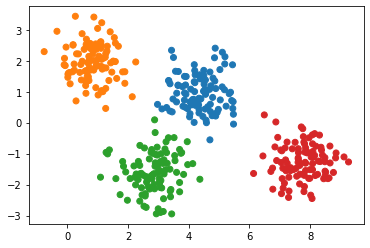

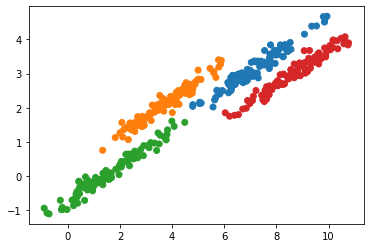

In [4]:
fig, ax = plt.subplots()

colors = {1:'tab:blue', 2:'tab:orange', 3:'tab:green', 4:'tab:red'}

ax.scatter(data1['X1'], data1['X2'], c=data1['truth'].map(colors))

fig, ax = plt.subplots()

ax.scatter(data2['X1'], data2['X2'], c=data2['truth'].map(colors))

plt.show()

# Apply Kmeans

###### from sklearn.cluster import KMeans
import seaborn as sns

km41 = KMeans(n_clusters=4, n_init=20).fit(data1[['X1', 'X2']])
km42 = KMeans(n_clusters=4, n_init=20).fit(data2[['X1', 'X2']])

fig, ax = plt.subplots()

sns.scatterplot(data = data1, x='X1', y='X2', hue = km41.predict(data1[['X1', 'X2']]))

ax.scatter(km41.cluster_centers_[:,0], km41.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")

plt.legend()

fig, ax = plt.subplots()

sns.scatterplot(data = data2, x='X1', y='X2', hue = km42.predict(data2[['X1', 'X2']]))

ax.scatter(km42.cluster_centers_[:,0], km42.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")

plt.legend()

k-means is not effective for the dataset 2

# Apply GMM

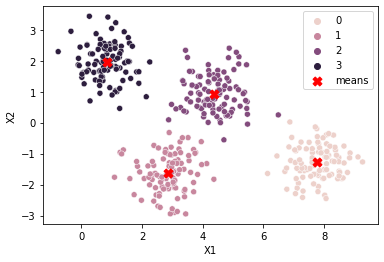

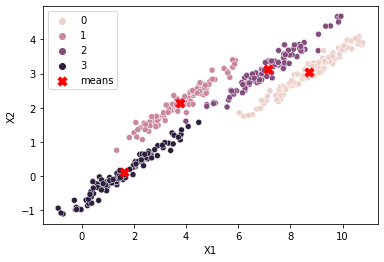

In [5]:
from sklearn.mixture import GaussianMixture

gm1 = GaussianMixture(n_components=4, random_state=0).fit(data1[['X1', 'X2']])
gm2 = GaussianMixture(n_components=4, random_state=0).fit(data2[['X1', 'X2']])

fig, ax = plt.subplots()

sns.scatterplot(data = data1, x='X1', y='X2', hue = gm1.predict(data1[['X1', 'X2']]))

ax.scatter(gm1.means_[:,0], gm1.means_[:,1],
            marker="X", c="r", s=80, label="means")

plt.legend()



fig, ax = plt.subplots()

sns.scatterplot(data = data2, x='X1', y='X2', hue = gm2.predict(data2[['X1', 'X2']]))

ax.scatter(gm2.means_[:,0], gm2.means_[:,1],
            marker="X", c="r", s=80, label="means")

plt.legend()

In [7]:
from sklearn import mixture

n_components = np.arange(1, 21)

models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(data1) for n in n_components]

AttributeError: 'NoneType' object has no attribute 'split'

In [6]:
gmm_model_comparisons=pd.DataFrame({"n_components" : n_components,
                                  "BIC" : [m.bic(data1) for m in models],
                                   "AIC" : [m.aic(data1) for m in models]})
gmm_model_comparisons.head(20)

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        print(np.sqrt(covariance))
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X['X1'], X['X2'], c=labels, s=40, zorder=2)
    else:
        ax.scatter(X['X1'], X['X2'], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, [gmm.covariances_[n][:2, :2] for n in range(0,4)], gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)


# With this in place, we can take a look at what the four-component GMM gives us for our initial data:
gmm = mixture.GaussianMixture(n_components=4, random_state=42)

plot_gmm(gmm, data2)

# EM on 1D

In [ ]:
#EM on 1D
#8

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300,
                  n_features=1,
                  centers=3, 
                  cluster_std=2,
                  random_state=2021)


In [ ]:
data = pd.DataFrame(X)
data.columns = ["X"]

data["source"] = y
data['source'].unique()


In [ ]:
gmm = GaussianMixture(2, covariance_type='full', random_state=0).fit(data["X"])

plt.figure(figsize=(9,7))

sns.scatterplot(data=data, x="X", hue="source")
plt.savefig("fig 1 dim",format='png',dpi=150)